In [592]:
!pip install scikit-fuzzy

In [593]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [594]:
#criação das variáveis
#define as unidades de cada varíaveis 
#nb- ńivel da barragem, podendo variar de 0 at́é 20 metros
#nr- ńivel do rio, podendo variar de 0 at́é 12 metros
#nb- ńivel da barragem, podendo varia de 0 at́é 20 metros
#op - operação na barragem, considerando 8 comportas para a operação
#x_nb = np.arange(0, 20, 1)
nivelRio = ctrl.Antecedent(np.arange(0, 13, 1), 'nivelRio')
qtChuva = ctrl.Antecedent(np.arange(0, 60, 1), 'qtChuva')
operacao = ctrl.Consequent(np.arange(0, 11, 1), 'operacao')

In [601]:
nivelRio.automf(names=['normal', 'medio', 'alto'])
qtChuva.automf(names=['pouca', 'media', 'bastante'])
operacao.automf(3)

In [602]:
#processo de fuzzificação da variável operacao

operacao['aberta'] = fuzz.trimf(operacao.universe, [0, 0, 5])
operacao['meio'] = fuzz.trimf(operacao.universe, [0, 5, 10])
operacao['fechada'] = fuzz.trimf(operacao.universe, [5, 10, 10])

/home/momo/anaconda3/lib/python3.8/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


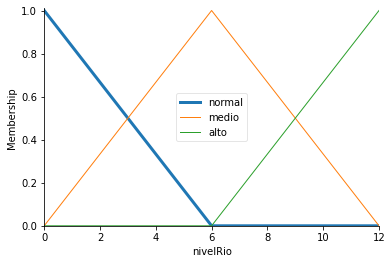

In [603]:
nivelRio['normal'].view()

/home/momo/anaconda3/lib/python3.8/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


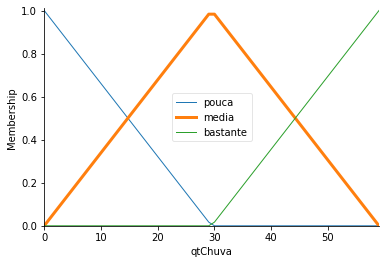

In [604]:
qtChuva['media'].view()

/home/momo/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


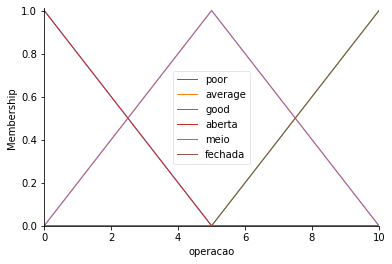

In [605]:
operacao.view()

In [608]:
regra1 = ctrl.Rule(nivelRio['normal'] | qtChuva['pouca'], operacao['aberta'])

In [609]:
regra2 = ctrl.Rule(nivelRio['normal'] | qtChuva['media'], operacao['aberta'])

In [610]:
regra3 = ctrl.Rule(nivelRio['normal'] | qtChuva['bastante'], operacao['meio'])

In [611]:
regra4 = ctrl.Rule(nivelRio['medio'] | qtChuva['pouca'], operacao['meio'])

In [613]:
regra5 = ctrl.Rule(nivelRio['medio'] | qtChuva['media'], operacao['fechada'])

In [614]:
regra6 = ctrl.Rule(nivelRio['medio'] | qtChuva['bastante'], operacao['fechada'])

In [615]:
regra7 = ctrl.Rule(nivelRio['alto'] | qtChuva['pouca'], operacao['fechada'])

In [616]:
regra8 = ctrl.Rule(nivelRio['alto'] | qtChuva['media'], operacao['fechada'])

In [617]:
regra9 = ctrl.Rule(nivelRio['alto'] | qtChuva['bastante'], operacao['fechada'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa5bb54f550>)

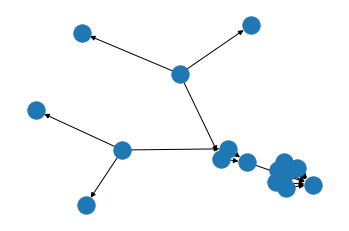

In [618]:
regra1.view()

In [619]:
tipping_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])

In [620]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [621]:
tipping.input['nivelRio'] = 10.0
tipping.input['qtChuva'] = 40.0

In [622]:
tipping.compute()

5.031763237323081


/home/momo/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


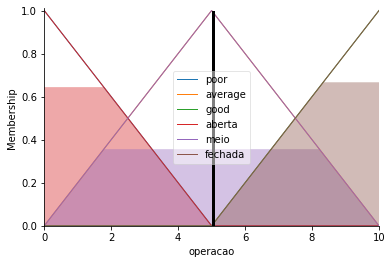

In [623]:
print (tipping.output['operacao'])
operacao.view(sim=tipping)